# Graph Types

## Lesson Overview

A variety of graph types exist beyond directed, undirected, weighted graphs, often depending on things like connectivity between nodes.

> A **connected graph** is a graph in which a path exists between every pair of nodes.

> A **disconnected graph** is a graph that is not connected.

Note that this doesn't mean that every node in a connected graph has an edge to every other node! It only means that every part of the graph is reachable from any node. For instance, in the following connected graph, nodes $4$ and $6$ do not share an edge, but a path exists between them.

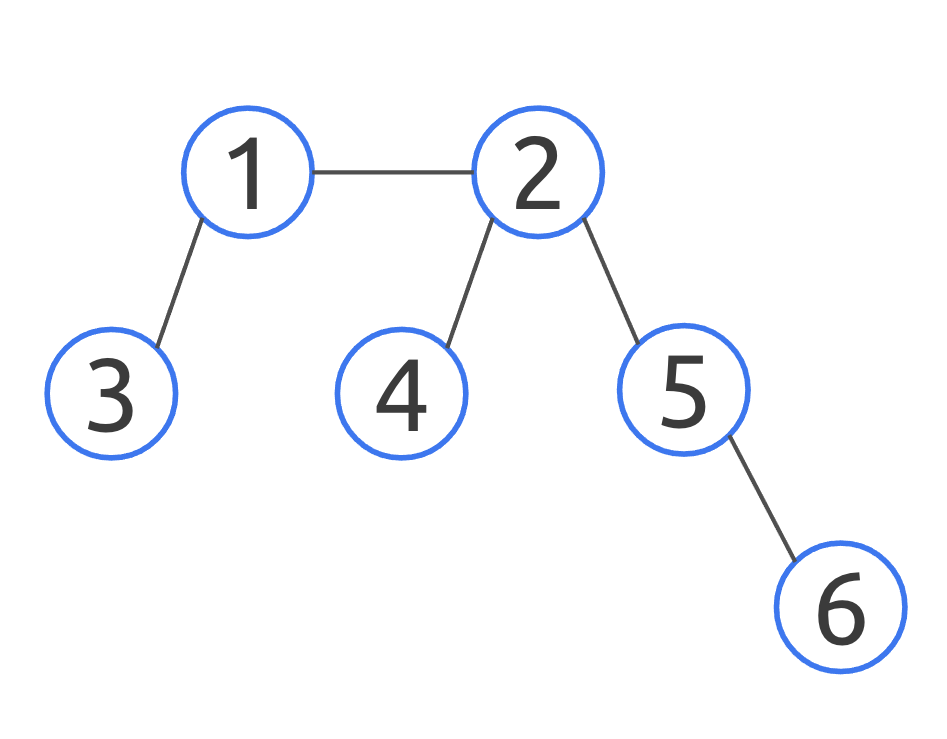

If we were to eliminate the $2 \rightarrow 5$ edge, as below, the path between $4$ and $6$ no longer exists.

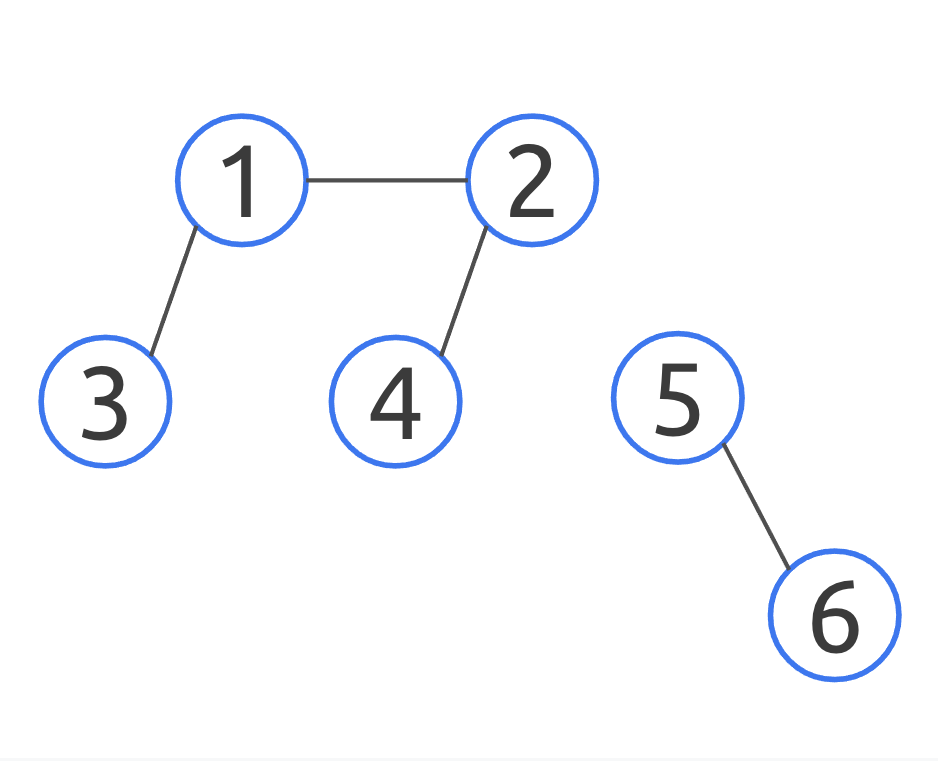

The above graph is now disconnected, and is divided into two distinct subgraphs. While the graph overall is now a disconnected graph, the two subgraphs are connected.

In the case of directed graphs, connectedness gets a little bit more complicated.

> A directed graph is **weakly connected** if replacing every directed edge in the graph with a undirected edge results in a connected graph.

> A directed graph is **strongly connected** if there is a directed path between every pair of nodes in the graph.

### Complete graphs

> A **complete graph** is a graph in which an edge exists between every pair of nodes.



Note the distinction between a path and an edge: a path between nodes $A$ and $B$ may include multiple additional nodes and edges between $A$ and $B$. For instance, the following graph is complete:

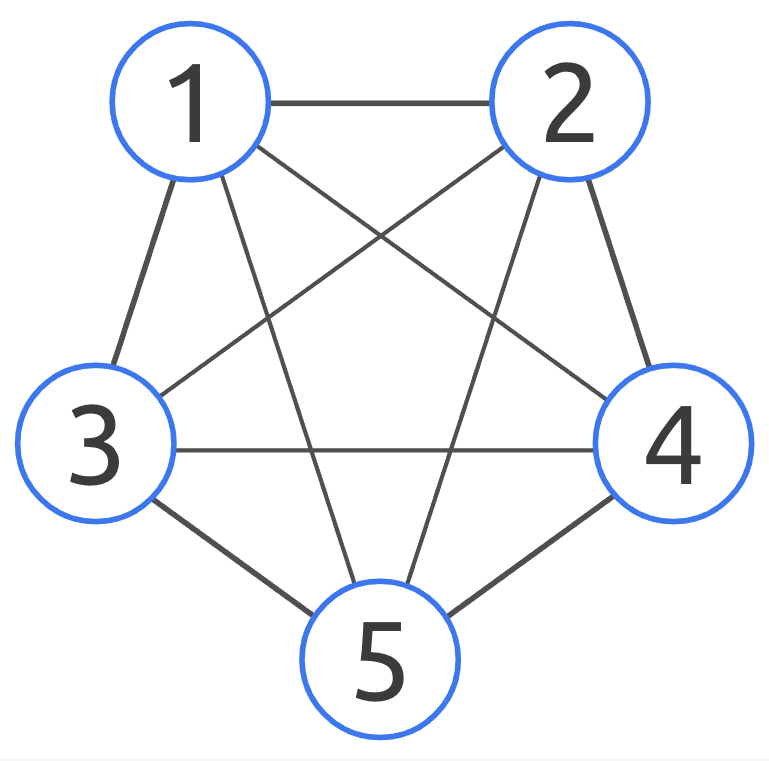

### Bipartite graphs

> A **bipartite graph** is a graph that can be divided into two distinct groups of nodes $A$ and $B$ such that every edge in the graph connects a node in $A$ with a node in $B$.

The following graph, for instance, is bipartite, where the two groups are:

1. $[1, 2, 3, 4, 9, 11]$
1. $[5, 6, 7, 8, 10]$

Try re-drawing the graph so that it's more clearly bipartite to double-check!

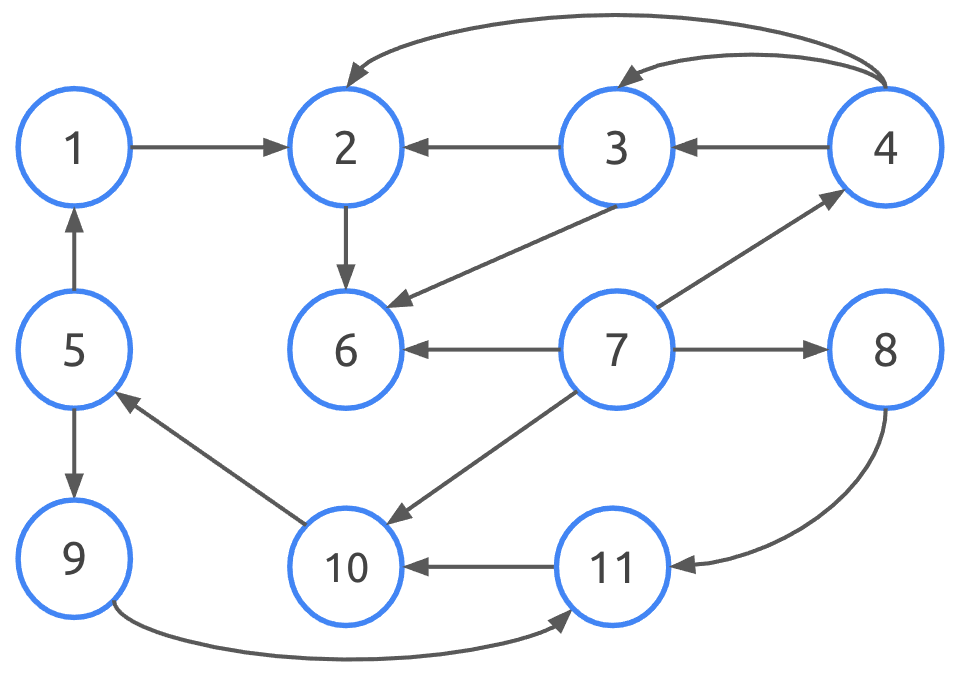

### Cyclic graphs and other graph types

> A **cyclic graph** is a graph that contains a cycle, or a path in which the first and last nodes are the same.

This graph is cyclic, since there exists a cycle $5 \rightarrow 3 \rightarrow 6 \rightarrow 7 \rightarrow 5$:

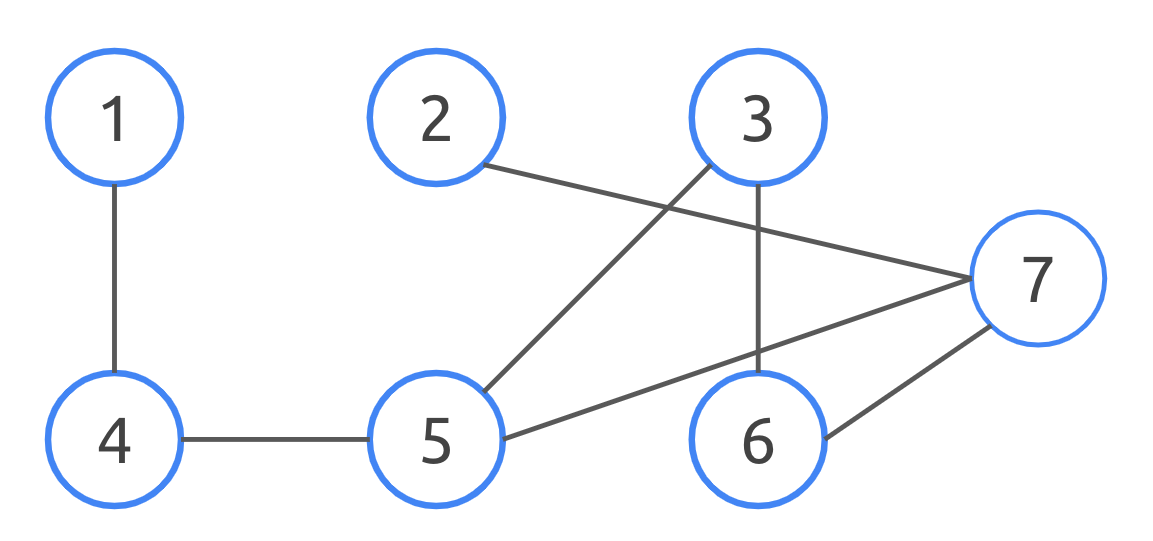

There are more complex types of graphs, such as the directed acyclic graph, commonly known as a **DAG**, a directed graph that contains no cycles. The set of graphs we've shown thus far is not an exhaustive list of types of graphs, but it serves to demonstrate the wide variety of types of graphs that exist to solve problems in computer science.

## Question 1

Which of the following statements about a complete graph are true?

**a)** A complete graph contains an $A \rightarrow B$ path for every pair of nodes $A$ and $B$.

**b)** A complete graph is an ideal use case for an adjacency matrix, as every node is connected to every other node.

**c)** A complete graph with $n$ nodes has $n$ edges, as every node is connected to every other node.

**d)** All complete graphs are cyclic graphs.

### Solution

The correct answers are **a)**, **b)**, and **d)**.

**c)** Since every node is connected to every other node, that can't hold, especially as the graph grows in size. Even in small graphs, we can disprove that with a quick example. A complete graph with two nodes in it has one edge, between the two nodes.

## Question 2

Let's try to identify complete graphs algorithmically. Write an `is_complete` method that returns `True` if the graph is complete and `False` otherwise.

Recall that a complete graph is a graph where every $U, V$ pair of nodes has an edge connecting the nodes.

In [ ]:
class Node:

  def __init__(self, name):
    self.name = name
    self.connected_to = []

  def add_connection(self, node):
    # Creates a representation of an edge between two nodes. Since this graph is
    # undirected, for nodes A and B, this method creates an A -> B edge and a
    # B -> A edge.
    if node not in self.connected_to:
      self.connected_to.append(node)
    if self not in node.connected_to:
      node.connected_to.append(self)

  def __str__(self):
    return 'node %s, connected to %s' % (self.name, self.connected_to)

class UndirectedGraph:

  def __init__(self):
    self.node_list = []

  def add_node(self, node):
    # Adds a node to the graph.
    self.node_list.append(node)

  def remove_node(self, node):
    # Removes a node from the graph. Note that this method has to remove all
    # the node's edges, as well.
    self.node_list.remove(node)
    for potential_node in self.node_list:
      if node in potential_node.connected_to:
        potential_node.connected_to.remove(node)
    node.connected_to = []

  def print(self):
    # Prints the graph.
    for node in self.node_list:
      print(node)

  def is_complete(self):
    # TODO(you): implement.
    print('This method has not been implemented.')

### Hint

Since the graph is undirected, for every $U \rightarrow V$ edge, there also exists a $V \rightarrow U$ edge. You can also assume that these are **simple graphs**, or graphs that have no duplicate edges.

As a result, you may not even need to traverse the graph; you just need to check that every node is connected to every other node. Given that `connected_to` does exactly that for a given node, it may be a good idea to count each node's number of connections to see if each node is connected to every other node.

### Unit Tests

Run the following cell to check your answer against some unit tests.

In [ ]:
node_list = [Node(0), Node(1), Node(2), Node(3)]

graph = UndirectedGraph()
for node in node_list:
  graph.add_node(node)

node_list[0].add_connection(node_list[1])
node_list[0].add_connection(node_list[2])
node_list[0].add_connection(node_list[3])
node_list[1].add_connection(node_list[2])
node_list[1].add_connection(node_list[3])
node_list[2].add_connection(node_list[3])

print(graph.is_complete())
# Should print: True

node_list.append(Node(4))
graph.add_node(node_list[4])
node_list[4].add_connection(node_list[0])

print(graph.is_complete())
# Should print: False

### Solution

In [ ]:
class Node:

  def __init__(self, name):
    self.name = name
    self.connected_to = []

  def add_connection(self, node):
    # Creates a representation of an edge between two nodes. Since this graph is
    # undirected, for nodes A and B, this method creates an A -> B edge and a
    # B -> A edge.
    if node not in self.connected_to:
      self.connected_to.append(node)
    if self not in node.connected_to:
      node.connected_to.append(self)

  def __str__(self):
    return 'node %s, connected to %s' % (self.name, self.connected_to)


class UndirectedGraph:

  def __init__(self):
    self.node_list = []

  def add_node(self, node):
    self.node_list.append(node)

  def print(self):
    for node in self.node_list:
      print(node)

  def is_complete(self):
    for node in self.node_list:
      if len(node.connected_to) == (len(self.node_list) - 1):
        # This node is connected to every other node in the graph, so we can
        # move on.
        continue
      else:
        return False
    return True

## Question 3

The next few questions will focus on a concept called **graph isomorphism**.

Consider two graphs $G$ and $H$.

In $G$:

*   Node 1 is connected to Nodes 2, 3, and 4.
*   Node 2 is connected to Nodes 1 and 4.
*   Node 3 is connected to Nodes 1 and 3.
*   Node 4 is connected to Nodes 1, 2, and 4.

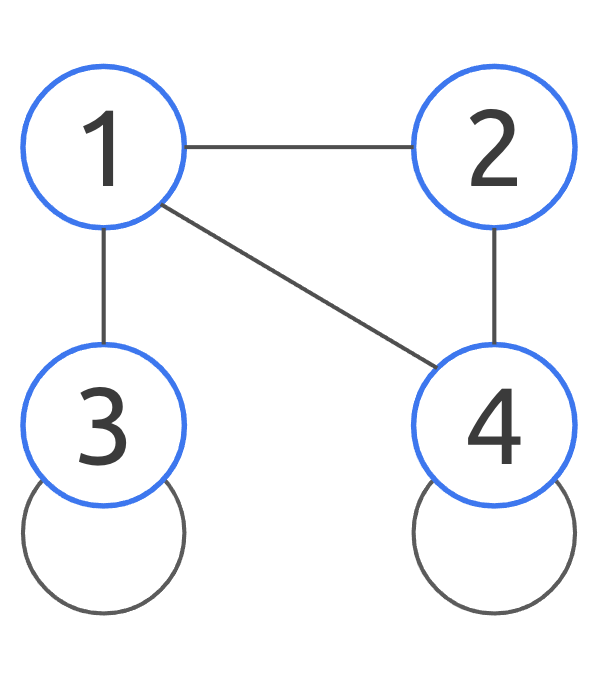

In $H$:

*   Node 1 is connected to Nodes 2 and 3.
*   Node 2 is connected to Nodes 1, 2, and 3.
*   Node 3 is connected to Nodes 1, 2, and 4.
*   Node 4 is connected to Nodes 3 and 4.

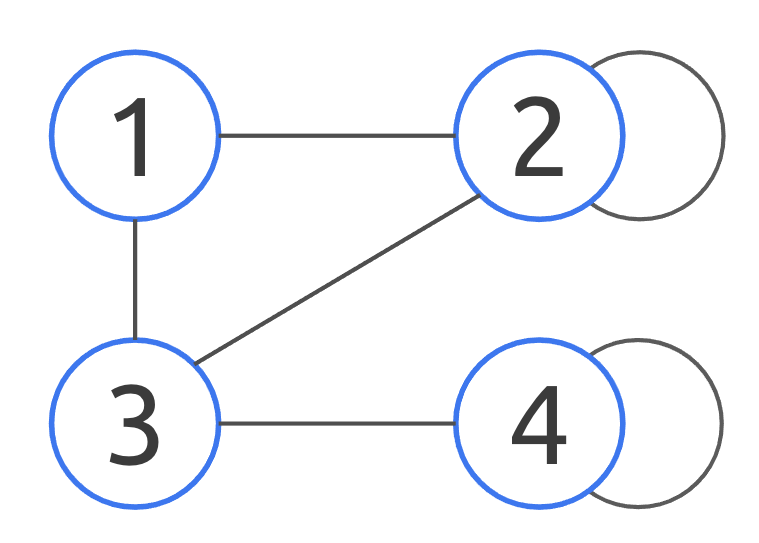

Looking at these two graphs, you may notice that they have fairly similar structures (they're the same graph with the vertices reordered and renumbered). This is commonly referred to as **graph isomorphism**.

Proving two graphs are isomorphic is computationally challenging, so let's instead focus on cases in which graphs are definitively **not** isomorphic. One case of non-isomorphism is if the given graphs have different numbers of nodes.

Write a `has_same_number_of_nodes` function that returs `True` if two graphs have the same number of nodes, and `False`, otherwise.

In [ ]:
#persistent
class Node:

  def __init__(self, name):
    self.name = name
    self.connected_to = []

  def add_connection(self, node):
    self.connected_to.append(node)
    node.connected_to.append(self)

  def __str__(self):
    return 'node %s, connected to %s' % (self.name, self.connected_to)

class UndirectedGraph:

  def __init__(self):
    self.node_list = []

  def add_node(self, node):
    self.node_list.append(node)

  def print(self):
    for node in self.node_list:
      print(node)

In [ ]:
def has_same_number_of_nodes(graph_one, graph_two):
  # TODO(you): Implement

  print('This function has not been implemented.')

### Hint

Given that each graph keeps track of the number of nodes that it has, use `node_list` to check one graph against another.

### Unit Tests

Run the following cell to check your answer against some unit tests.

In [ ]:
node_list_one = [Node(0), Node(1), Node(2), Node(3)]
node_list_two = [Node(2), Node(5), Node(6), Node(7)]
node_list_three = [Node(0), Node(1), Node(2), Node(3), Node(4)]
node_list_four = [Node(2), Node(5), Node(6), Node(7)]

graph_one = UndirectedGraph()
for node in node_list_one:
  graph_one.add_node(node)

graph_two = UndirectedGraph()
for node in node_list_two:
  graph_two.add_node(node)

graph_three = UndirectedGraph()
for node in node_list_three:
  graph_three.add_node(node)

graph_four = UndirectedGraph()
for node in node_list_four:
  graph_four.add_node(node)

print(has_same_number_of_nodes(graph_one, graph_two))
# Should print: True

print(has_same_number_of_nodes(graph_two, graph_three))
# Should print: False

print(has_same_number_of_nodes(graph_one, graph_four))
# Should print: True

### Solution

For a given pair of graphs, we should check the length of their `node_list` objects. If they're the same length, then the graphs have the same number of nodes.

In [ ]:
def has_same_number_of_nodes(graph_one, graph_two):
  return len(graph_one.node_list) == len(graph_two.node_list)

## Question 4

Another thing that isomorphic graphs must have in common is the same number of edges. If two graphs have different numbers of edges, they cannot be isomorphic. Write a function called `has_same_number_of_edges` that takes two graphs and returns `True` if they have the same number of edges, `False` otherwise.

In [ ]:
def has_same_number_of_edges(graph_one, graph_two):
  # TODO(you): Implement
  print('This function has not been implemented.')

### Hint

Treat an $A \rightarrow B$ edge as distinct from a $B \rightarrow A$ edge (where $A \neq B$). As long as you're consistent, this won't cause a problem.

### Unit Tests

Run the following cell to check your answer against some unit tests.

In [ ]:
node_list_one = [Node(0), Node(1), Node(2), Node(3)]
node_list_two = [Node(2), Node(5), Node(6), Node(7)]
node_list_three = [Node(0), Node(1), Node(2), Node(3), Node(4)]
node_list_four = [Node(2), Node(5), Node(6), Node(7)]

graph_one = UndirectedGraph()
for node in node_list_one:
  graph_one.add_node(node)

node_list_one[0].add_connection(node_list_one[3])
node_list_one[2].add_connection(node_list_one[1])
node_list_one[0].add_connection(node_list_one[2])
node_list_one[2].add_connection(node_list_one[3])

graph_two = UndirectedGraph()
for node in node_list_two:
  graph_two.add_node(node)

node_list_two[0].add_connection(node_list_two[1])
node_list_two[1].add_connection(node_list_two[2])
node_list_two[2].add_connection(node_list_two[3])
node_list_two[3].add_connection(node_list_two[0])
node_list_two[1].add_connection(node_list_two[3])

graph_three = UndirectedGraph()
for node in node_list_three:
  graph_three.add_node(node)

node_list_three[0].add_connection(node_list_three[1])
node_list_three[0].add_connection(node_list_three[2])
node_list_three[2].add_connection(node_list_three[1])
node_list_three[2].add_connection(node_list_three[3])

graph_four = UndirectedGraph()
for node in node_list_four:
  graph_four.add_node(node)

node_list_four[3].add_connection(node_list_four[0])
node_list_four[2].add_connection(node_list_four[0])
node_list_four[1].add_connection(node_list_four[0])
node_list_four[1].add_connection(node_list_four[2])

print(has_same_number_of_edges(graph_one, graph_two))
# Should print: False

print(has_same_number_of_edges(graph_two, graph_three))
# Should print: False

print(has_same_number_of_edges(graph_one, graph_four))
# Should print: True

### Solution

One way to solve this is to treat both undirected graphs and directed graphs the same way, and count an $A \rightarrow B$ edge as distinct from a $B \rightarrow A$ edge. Given that undirected graphs have reciprocal edges, this means you'll double-count edges, but that doesn't matter since we're assuming both graphs are undirected in this example. Even if they're both directed, this should still work the same way.

In [ ]:
def has_same_number_of_edges(graph_one, graph_two):
  first_total_edges = 0
  for node in graph_one.node_list:
    first_total_edges += len(node.connected_to)

  second_total_edges = 0
  for node in graph_two.node_list:
    second_total_edges += len(node.connected_to)

  return first_total_edges == second_total_edges

## Question 5

Another potential way to check for isomorphism is to look at the degree of the nodes in the graph.

Consider the graphs used in a previous question, $G$ and $H$.

In $G$:

*   Node 1 is connected to Nodes 2, 3, and 4.
*   Node 2 is connected to Nodes 1 and 4.
*   Node 3 is connected to Nodes 1 and 3.
*   Node 4 is connected to Nodes 1, 2, and 4.

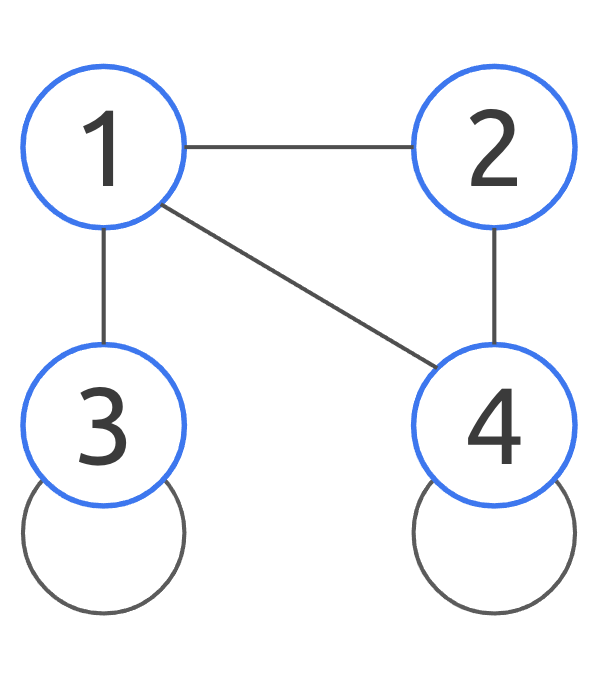

In $H$:

*   Node 1 is connected to Nodes 2 and 3.
*   Node 2 is connected to Nodes 1, 2, and 3.
*   Node 3 is connected to Nodes 1, 2, and 4.
*   Node 4 is connected to Nodes 3 and 4.

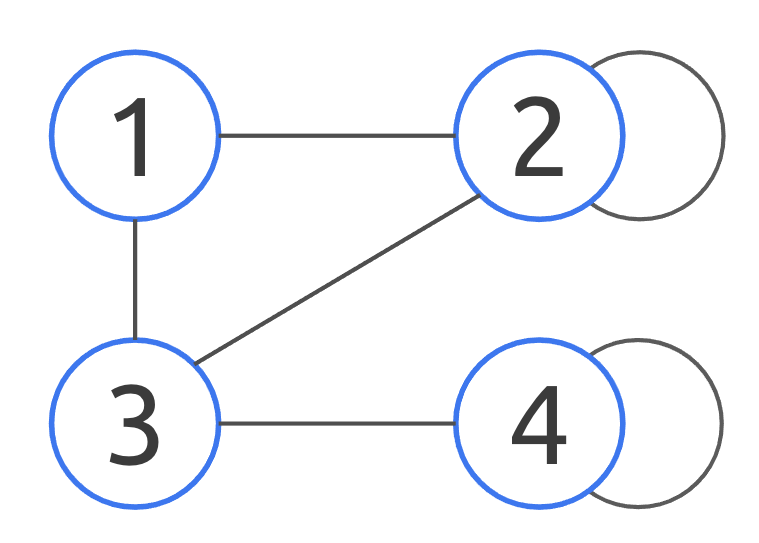

The degrees are as follows:

$G$: ```[3, 2, 2, 3]```

$H$: ```[2, 3, 3, 2]```

These can be reordered into non-increasing sequences called the **degree sequence**. $G$ and $H$ have the same degree sequence: `[3, 3, 2, 2]`. A set of isomorphic graphs all have the same degree sequence, but not all graphs with the same degree sequence are isomorphic. So one way of demonstrating non-isomorphism is to demonstrate that two graphs have different degree sequences.

Write a `has_same_degree_sequence` function that given two graphs $G$ and $H$, returns `True` if they share the same degree sequence, and `False` otherwise.

In [ ]:
class Node:

  def __init__(self, name):
    self.name = name
    self.connected_to = []

  def add_connection(self, node):
    self.connected_to.append(node)
    node.connected_to.append(self)

  def __str__(self):
    return 'node %s, connected to %s' % (self.name, self.connected_to)

  def get_degree(self):
    return len(self.connected_to)

In [ ]:
def has_same_degree_sequence(graph_one, graph_two):
  # TODO(you): Implement
  
  print('This function has not been implemented.')

### Hint

To sort from largest to smallest element, use `.sort(reverse=True)`.

In [ ]:
numbers = [1, 5, 6 , 1, 7]
numbers.sort(reverse=True)
print(numbers)

### Unit Tests

Run the following cell to check your answer against some unit tests.

In [ ]:
node_list_one = [Node(0), Node(1), Node(2), Node(3)]
node_list_two = [Node(2), Node(5), Node(6), Node(7)]
node_list_three = [Node(0), Node(1), Node(2), Node(3), Node(4)]
node_list_four = [Node(2), Node(5), Node(6), Node(7)]

graph_one = UndirectedGraph()
for node in node_list_one:
  graph_one.add_node(node)

node_list_one[0].add_connection(node_list_one[3])
node_list_one[2].add_connection(node_list_one[1])
node_list_one[0].add_connection(node_list_one[2])
node_list_one[2].add_connection(node_list_one[3])

graph_two = UndirectedGraph()
for node in node_list_two:
  graph_two.add_node(node)

node_list_two[0].add_connection(node_list_two[1])
node_list_two[1].add_connection(node_list_two[2])
node_list_two[2].add_connection(node_list_two[3])
node_list_two[3].add_connection(node_list_two[0])
node_list_two[1].add_connection(node_list_two[3])

graph_three = UndirectedGraph()
for node in node_list_three:
  graph_three.add_node(node)

node_list_three[0].add_connection(node_list_three[1])
node_list_three[0].add_connection(node_list_three[2])
node_list_three[2].add_connection(node_list_three[1])
node_list_three[2].add_connection(node_list_three[3])

graph_four = UndirectedGraph()
for node in node_list_four:
  graph_four.add_node(node)

node_list_four[3].add_connection(node_list_four[0])
node_list_four[2].add_connection(node_list_four[0])
node_list_four[1].add_connection(node_list_four[0])
node_list_four[1].add_connection(node_list_four[2])

print(has_same_degree_sequence(graph_one, graph_two))
# Should print: False

print(has_same_degree_sequence(graph_two, graph_three))
# Should print: False

print(has_same_degree_sequence(graph_one, graph_four))
# Should print: True

### Solution

We don't necessarily need to set `min_degree` to be `self.node_list + 1`,  but making it a number that is impossible to get from normal operations is often good for debugging. The highest degree a node in `self.node_list` can have is `len(self.node_list)`, so if you see a number higher than that you'll immediately know there's a bug.

In [ ]:
def has_same_degree_sequence(graph_one, graph_two):
  first_degree_sequence = []
  for node in graph_one.node_list:
    first_degree_sequence.append(node.get_degree())

  second_degree_sequence = []
  for node in graph_two.node_list:
    second_degree_sequence.append(node.get_degree())

  first_degree_sequence.sort(reverse=True)
  second_degree_sequence.sort(reverse=True)

  return first_degree_sequence == second_degree_sequence

## Question 6

Why are the following two graphs *not* isomorphic to each other?

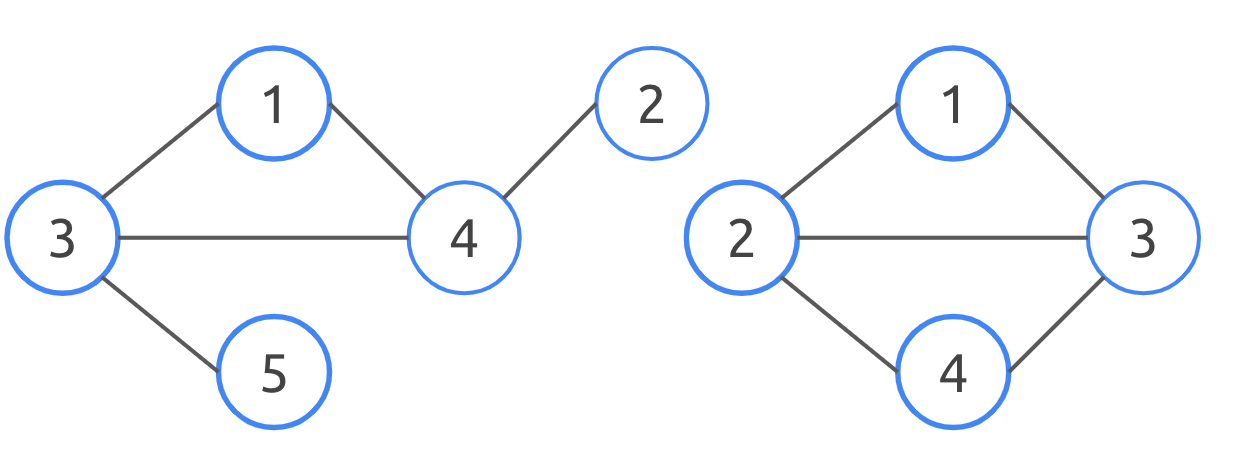

**a)** They have different numbers of nodes.

**b)** They have different numbers of edges.

**c)** They have different degree sequences.

**d)** Actually, these two graphs are isomorphic.

### Solution

The correct answers are **a)** and **c)**.

**b)** Try counting them again.

**d)** If they have different numbers of edges, they cannot be isomorphic to each other.

## Question 7

Why are the following two graphs *not* isomorphic to each other?

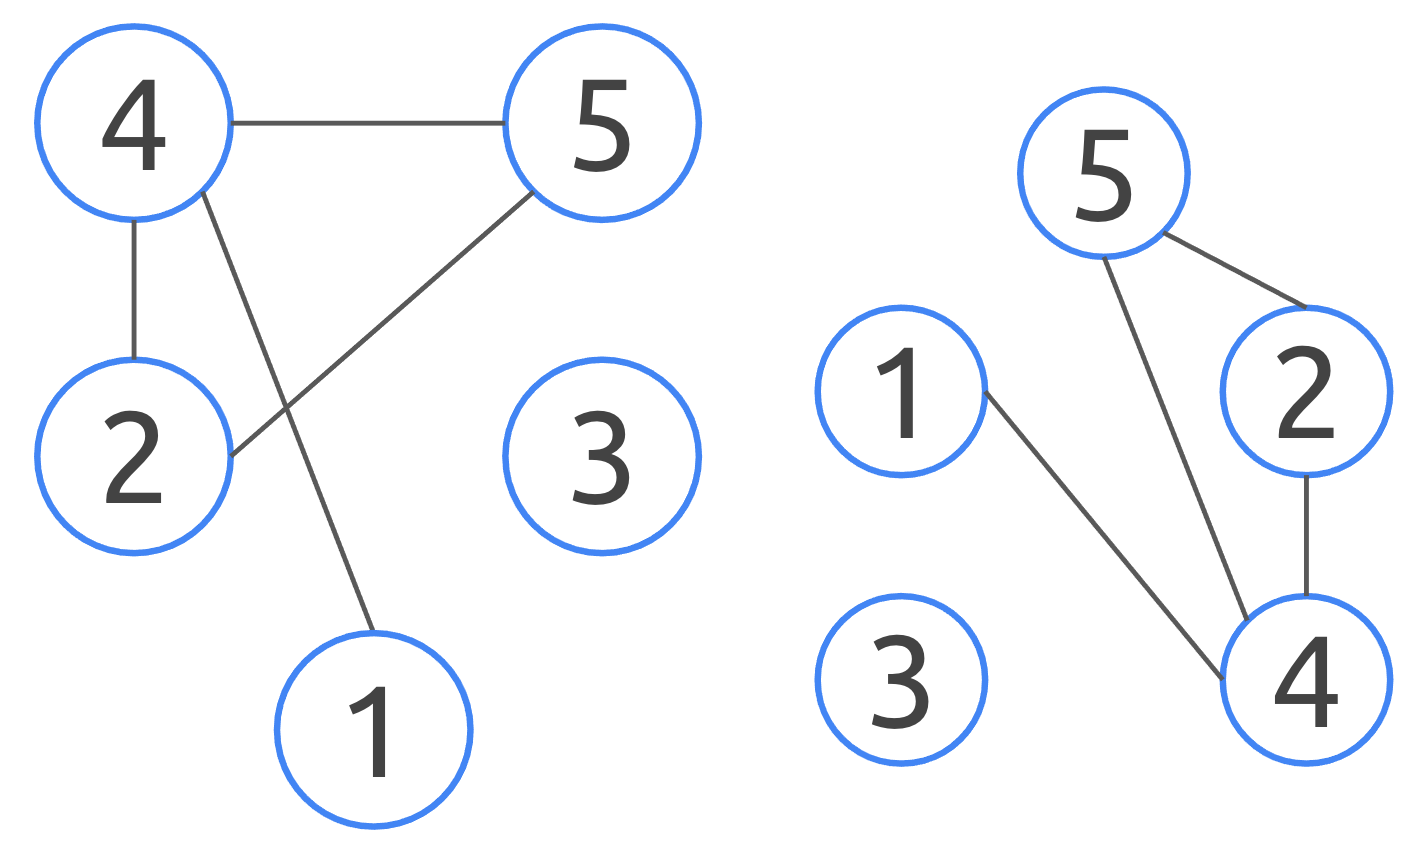

**a)** They have different numbers of nodes.

**b)** They have different numbers of edges.

**c)** They have different degree sequences.

**d)** Actually, these two graphs are isomorphs.

### Solution

The correct answer is **d)**.

**a)** Both have four nodes.

**b)** Try counting them again.

**c)** Both graphs have the same degree sequence.

## Question 8

Which of the following statements about a connected graph are true?

**a)** A connected graph contains an $A \rightarrow B$ edge for every pair of nodes $A$ and $B$.

**b)** A directed graph can still be considered connected if there is an $A \rightarrow B$ path but not a $B \rightarrow A$ path for every pair of nodes $A$ and $B$.

**c)** A connected graph may be directed or undirected, and/or weighted.

**d)** If a graph contains a cycle, it must be connected.

### Solution

The correct answer is **c)**.

**a)** That defines a complete graph.

**b)** It fails the criteria of a connected graph since no B -> A path exists, even though A and B share an edge. Directed graphs can be tricky to test for connectedness because of this.

**d)** A cycle implies that every node in the cycle is connectd to every other node in the cycle, but there can be other nodes outside the cycle.

## Question 9

Which of the following statements about a bipartite graph are true?

**a)** A bipartite graph cannot contain any cycles.

**b)** Bipartite graphs can be undirected.

**c)** If the nodes in graph $G$ can only be divided into groups $A$ and $B$ such that a node in $B$ is connected to another node in $B$, then the graph is not bipartite.

**d)** All bipartite graphs have an even number of nodes.

### Solution

The correct answers are **b)** and **c)**.

**a)** Cycles are permissible, as long as the nodes can be split into two groups A and B where every edge connects a node in A with a node in B. An odd cycle (a cycle with an odd number of edges) cannot exist in a bipartite graph, as a result.

**d)** Bipartite graphs can have an odd or even number of nodes.

## Question 10

Which of the following graphs are bipartite?

**a)** 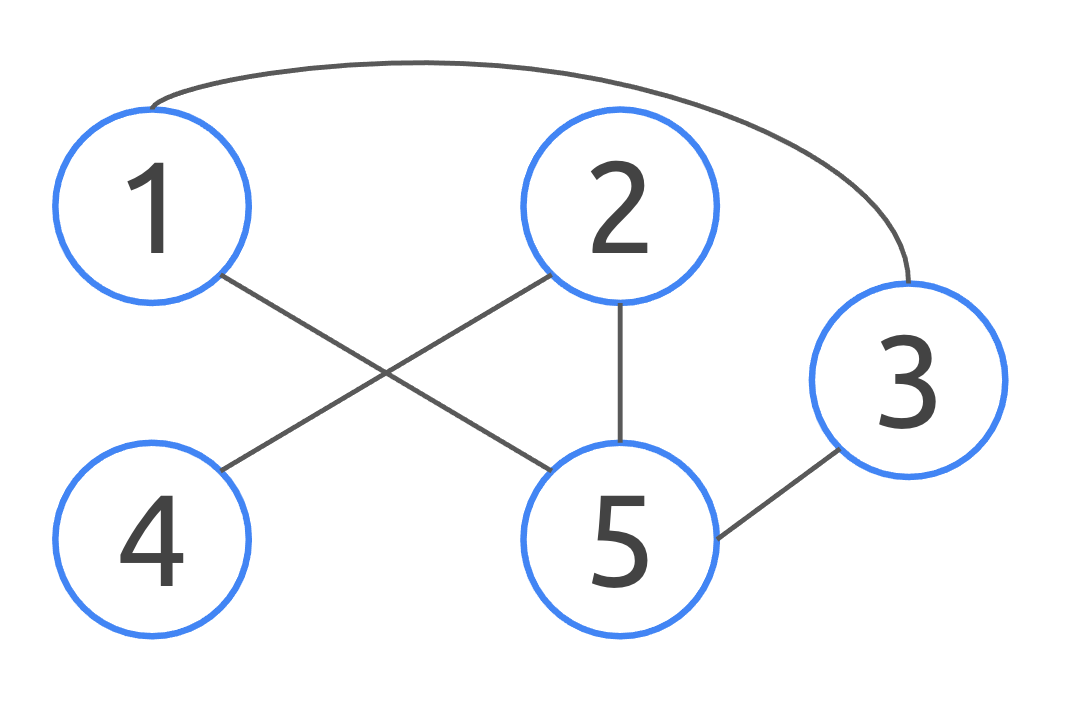

**b)**  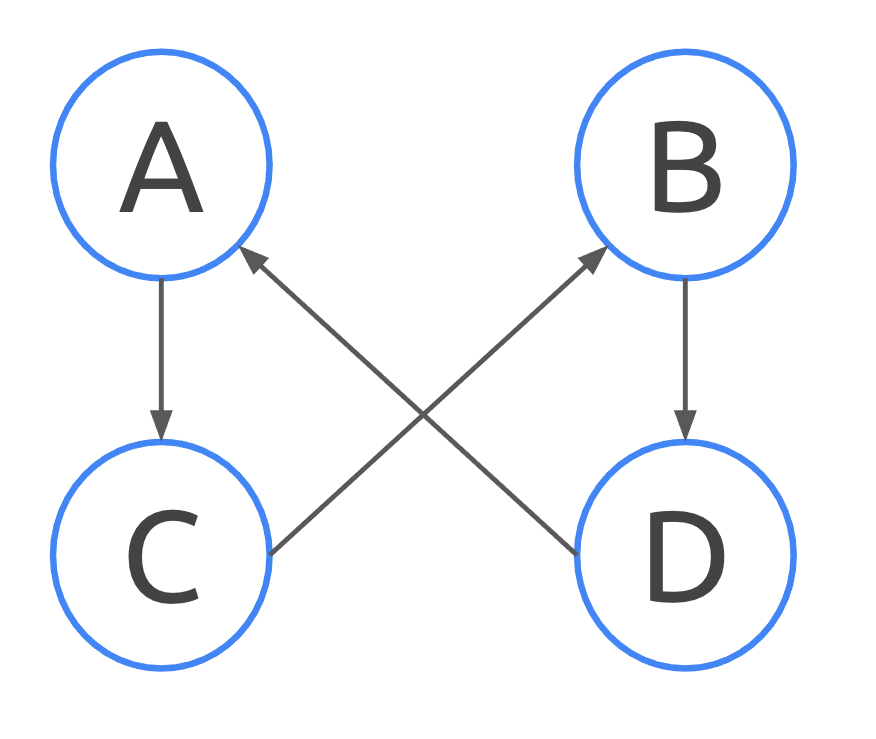

**c)** 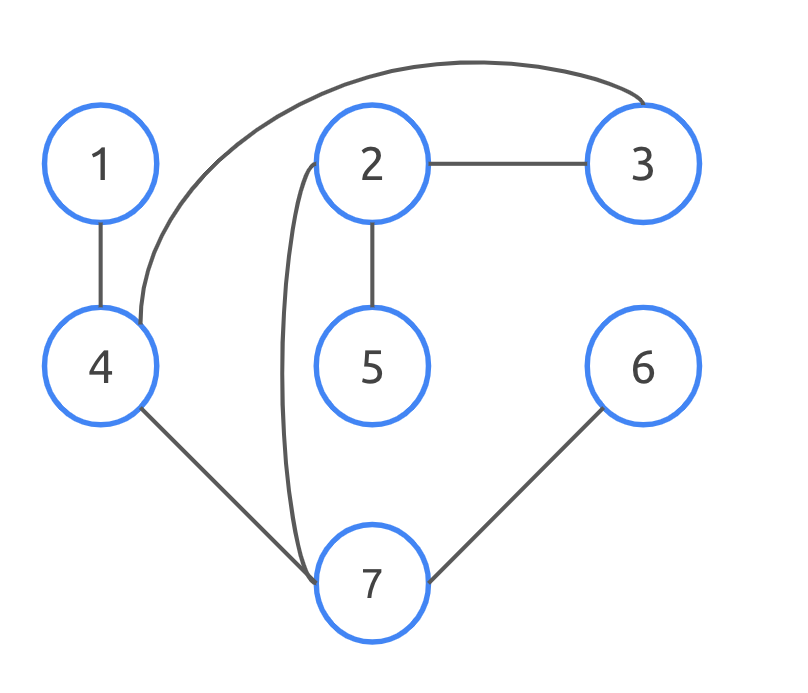

**d)** 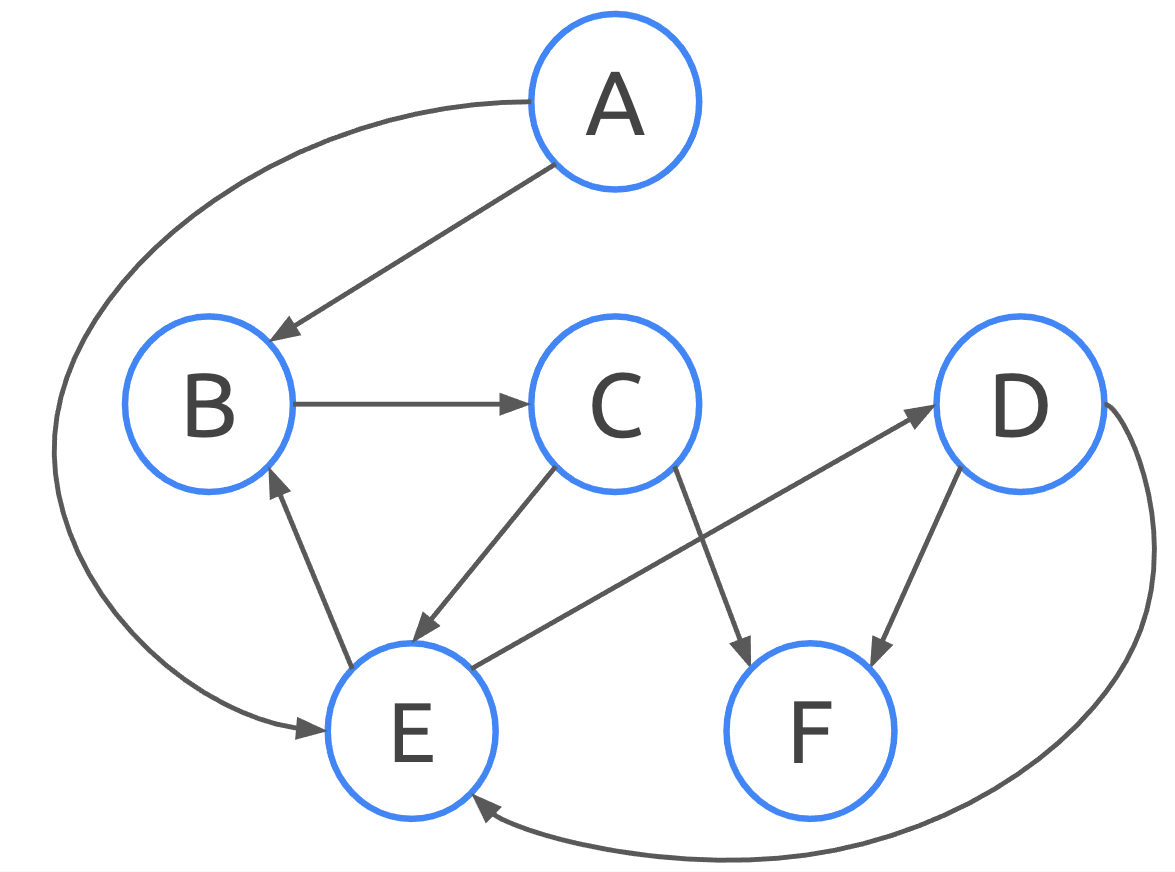

### Solution

The correct answers are **b)** and **c)**.

**a)** $1$, $3$, and $5$ are part of an odd cycle.

**d)** $B$, $C$, and $E$ are part of an odd cycle.

## Question 11

Which of the following statements about a directed acyclic graph are true?

**a)** A directed acyclic graph cannot be complete.

**b)** A directed acyclic graph cannot be connected.

**c)** A directed acyclic graph cannot be bipartite, as it does not contain any cycles.

**d)** It is possible for two directed acyclic graphs to be isomorphic to each other.

### Solution

The correct answers are **a)** and **d)**.

**b)** It is possible for a graph to be directed, acyclic, and connected. For example, imagine a graph that resembles a linked list where the last element links to the head.

**c)** It is possible to create a directed acyclic graph that is also bipartite (but such a graph cannot be strongly connected).

## Question 12

Which of the following graphs are directed acyclic graphs?

**a)** 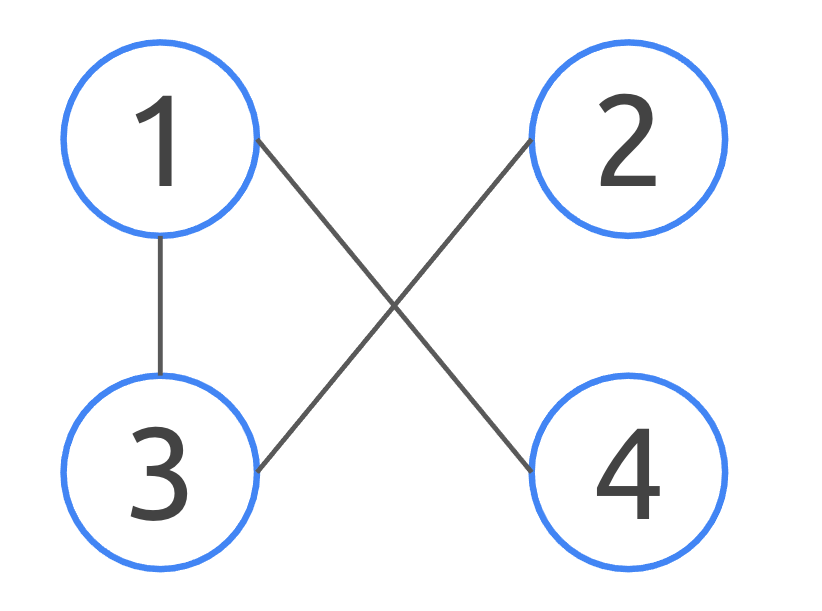

**b)** 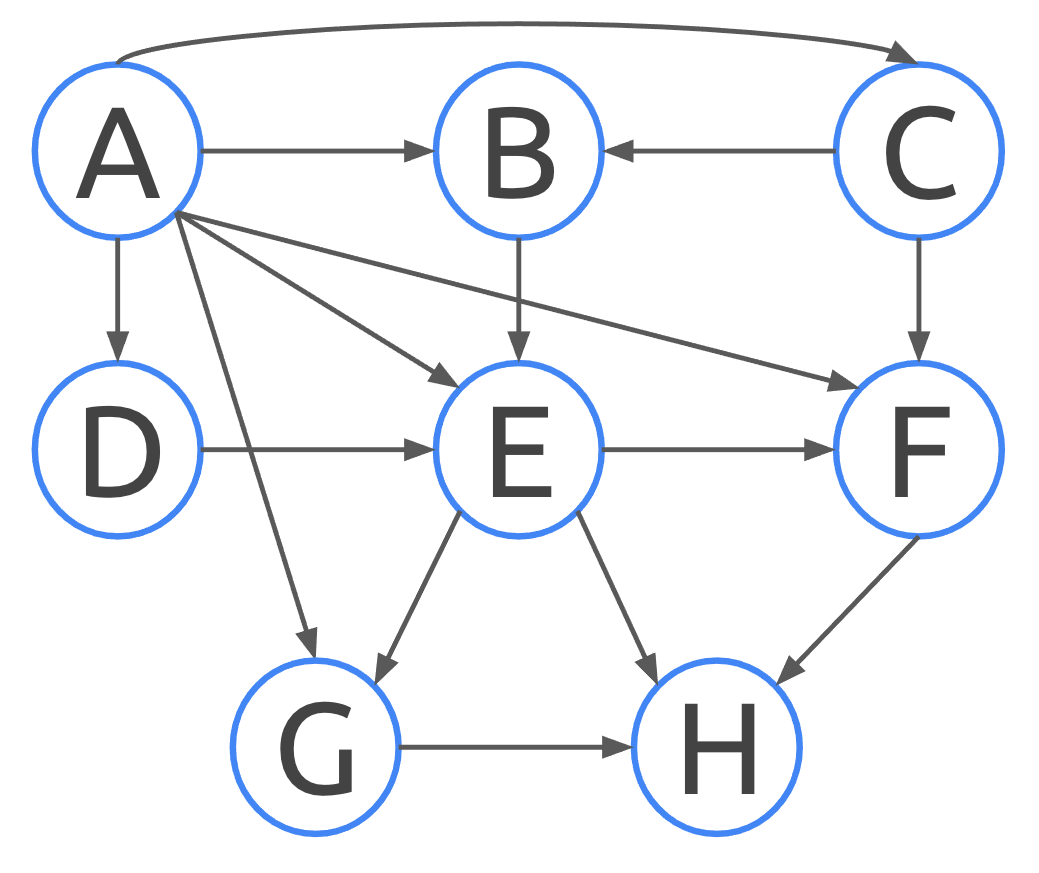

**c)** 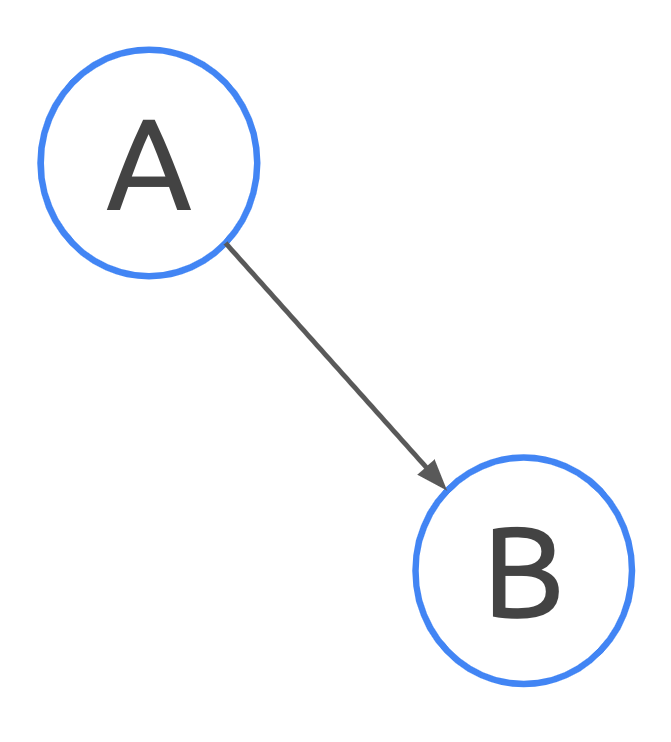

**d)** 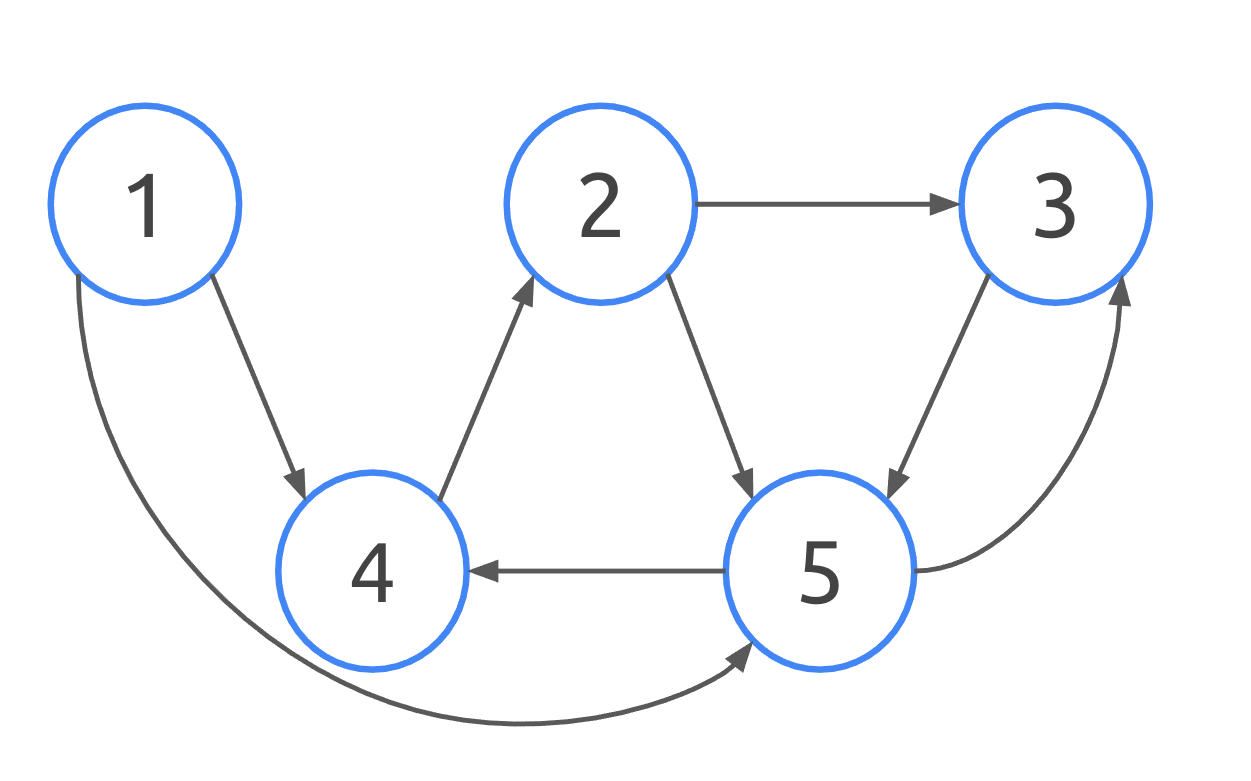

### Solution

The correct answers are **a)** and **d)**.

**a)** That is an undirected graph.

**d)** That graph has a cycle between $2$, $4$, and $5$.

## Question 13

A given graph $G$ is connected, undirected, cyclic, and bipartite. Which of the following statements about $G$ must be true?

**a)** Any node in $G$ is reachable from any other node in $G$.

**b)** $G$ is a DAG (directed acyclic graph).

**c)** $G$ must contain an even cycle.

**d)** There exists an $A \rightarrow B$ edge for every pair of nodes $A$ and $B$ in $G$.

### Solution

The correct answers are **a)** and **c)**.

**b)** $G$ is undirected and cylic.

**d)** The graph is connected, not necessarily complete.

## Question 14

Which of the following statements about the graph below are true?

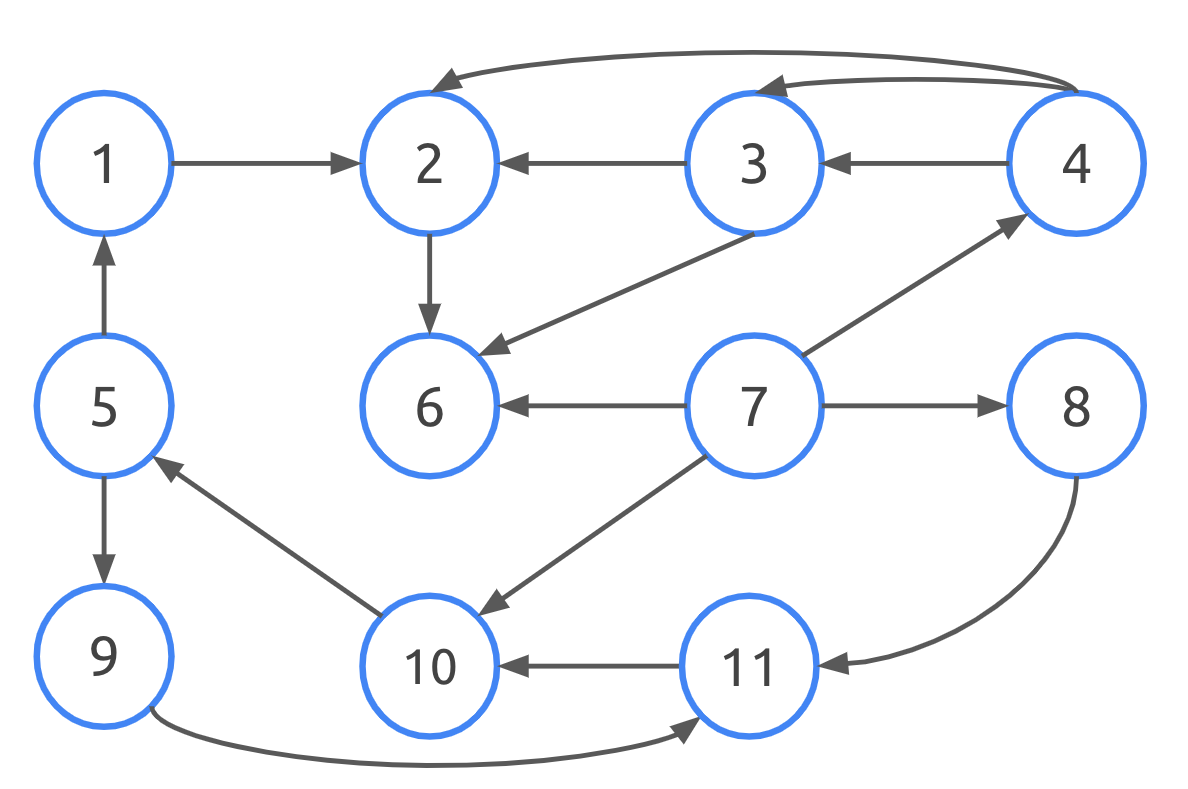

**a)** This graph is directed.

**b)** This graph is acyclic.

**c)** This graph is bipartite.

**d)** This graph is strongly connected.

### Solution

The correct answers are **a)** and **c)**.

**b)** A cycle exists between 11, 10, 5, and 9. Note that it is an even cycle.

**d)** While it is weakly connected, there is no directed path from 6 to any other nodes.